In [0]:
### Import all required packages

## for performing basic math operations
import numpy as np

## for loading and handling data
import pandas as pd

## for getting critical values(isf) and p-value(cdf)
import scipy.stats as stats

## for splitting data
from sklearn.model_selection import train_test_split

## for scaling the data
from sklearn.preprocessing import StandardScaler

## for finding the accuracy score and to analyse the confusion matrix
from sklearn import metrics

## for visualizations and plotting of data
from matplotlib import pyplot as plt

#  for more beautification
import seaborn as sns

## to handle warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## for the ML algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [0]:
# location where the data is available
data_url = "https://raw.githubusercontent.com/GreatLearningAIML1/bangalore-aug19-batch-knightriderX/master/Project-2/DataSets/Bank_Personal_Loan_Modelling.csv?token=ABRYHI3A7TERDFXSAT3HC6K5Y6HF4"

In [0]:
# load the data
customer_raw_data = pd.read_csv(data_url)

In [4]:
customer_raw_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
customer_raw_data.shape

(5000, 14)

In [6]:
customer_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
customer_raw_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
customer_raw_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
print("\nChecking if there are any missing values...")
print(customer_raw_data.isnull().sum())
customer_raw_data[customer_raw_data.isnull().any(axis=1)]


Checking if there are any missing values...
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


KG : There are no missing values!

In [10]:
customer_raw_data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [11]:
print(customer_raw_data.columns)

customer_raw_data_var_col = []
customer_raw_data_var_index = []

for i, col_name in enumerate(customer_raw_data.columns):
  if(np.var(customer_raw_data[col_name])<1):
    customer_raw_data_var_col.insert(i,col_name)
    customer_raw_data_var_index.insert(i,np.var(customer_raw_data[col_name]))


print(customer_raw_data_var_col,customer_raw_data_var_index)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'] [0.7052389999999473, 0.08678399999999314, 0.0935006399999973, 0.05675184000000552, 0.24062975999999453, 0.2075640000000132]


KG: There seems to be attributes with variance less than 1. Let's understand the relationship of each attribute with the other.

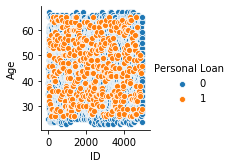

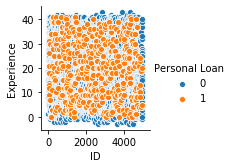

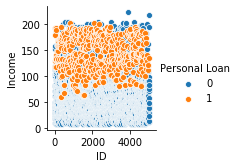

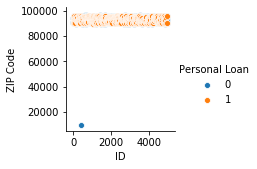

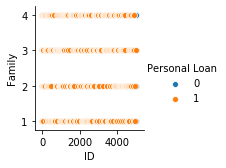

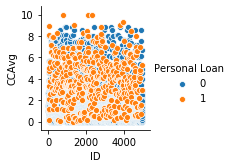

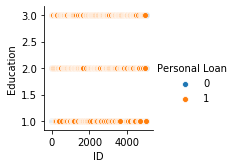

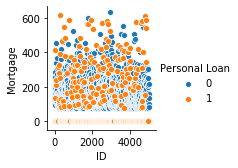

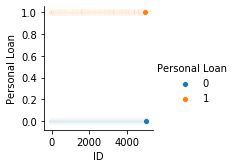

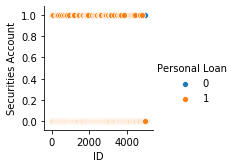

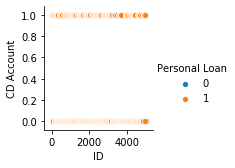

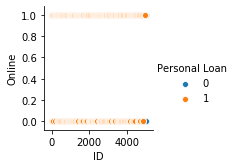

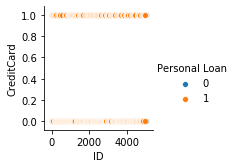

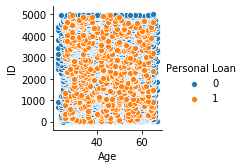

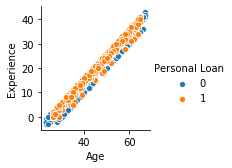

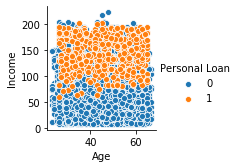

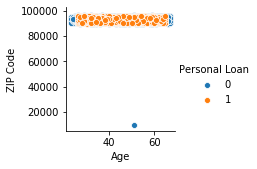

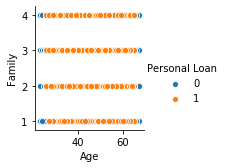

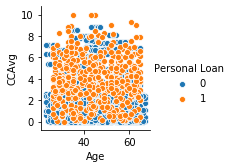

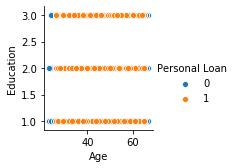

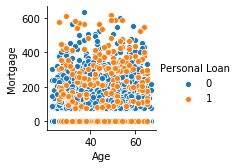

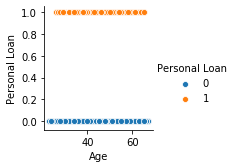

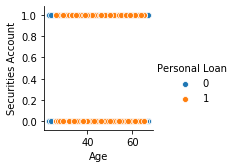

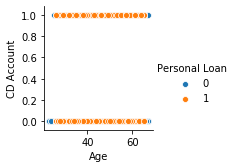

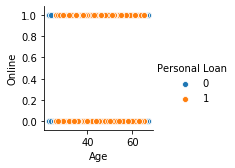

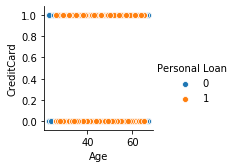

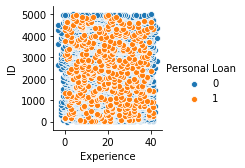

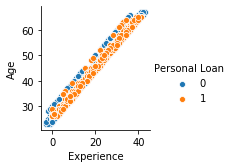

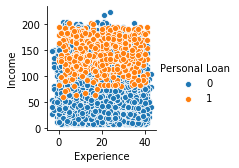

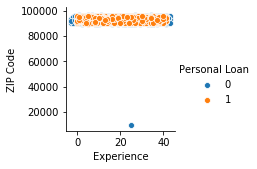

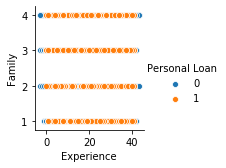

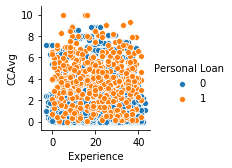

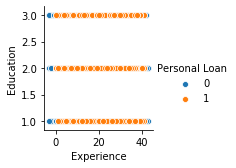

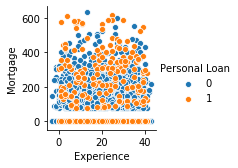

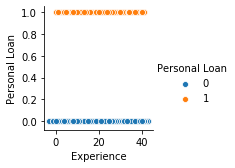

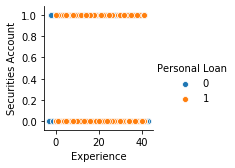

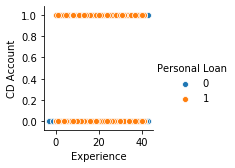

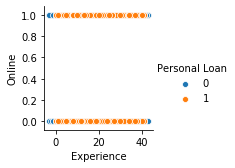

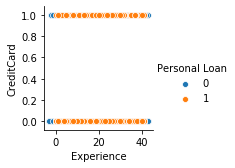

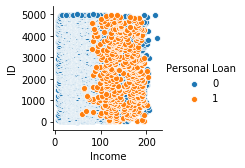

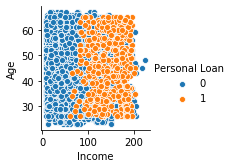

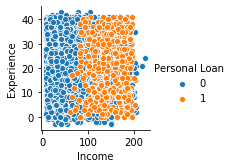

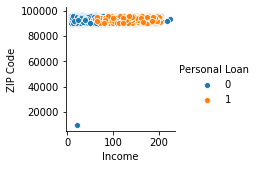

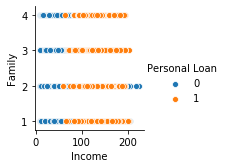

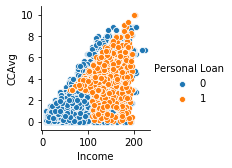

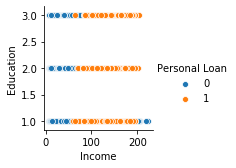

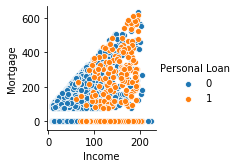

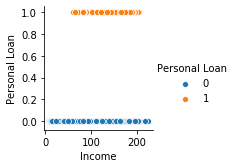

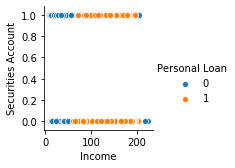

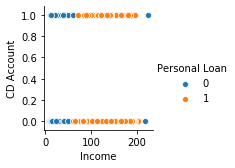

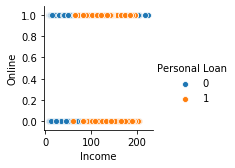

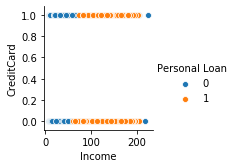

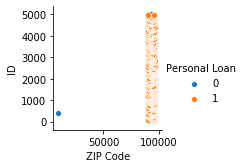

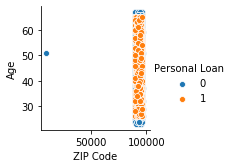

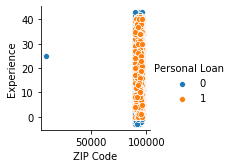

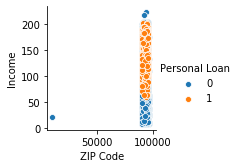

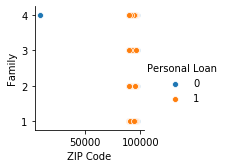

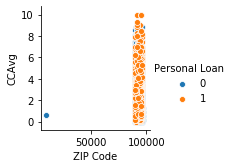

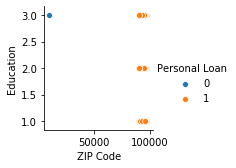

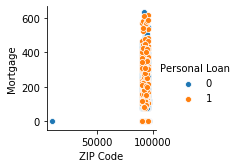

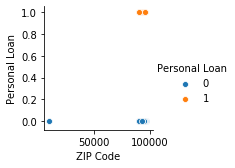

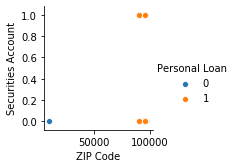

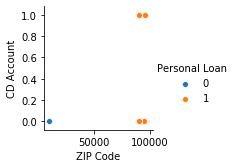

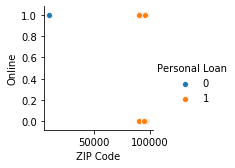

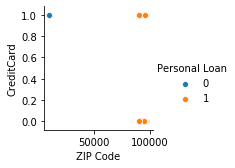

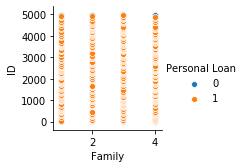

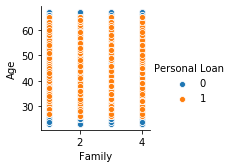

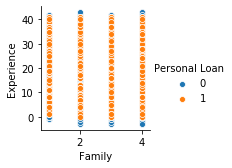

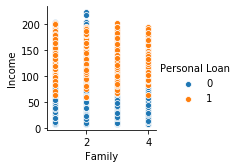

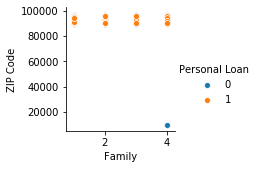

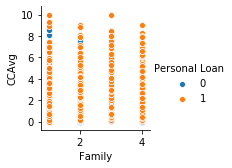

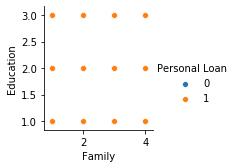

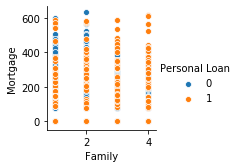

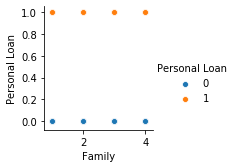

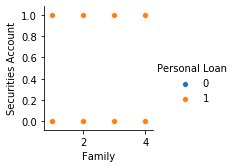

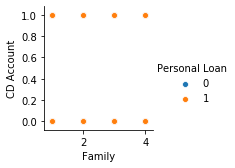

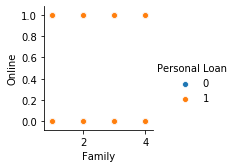

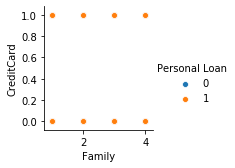

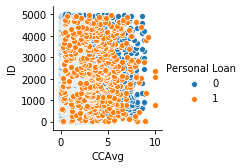

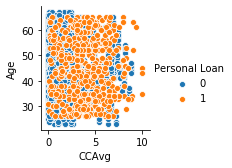

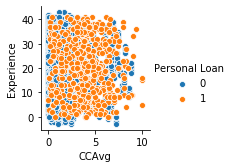

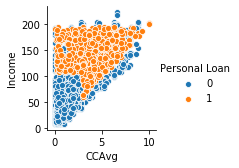

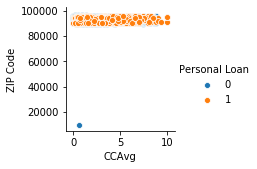

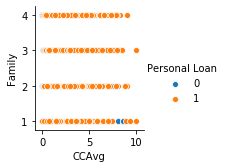

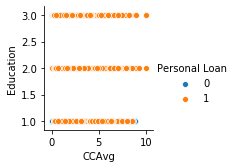

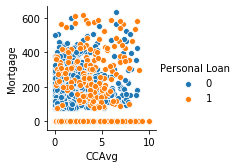

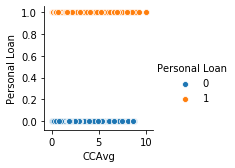

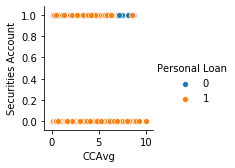

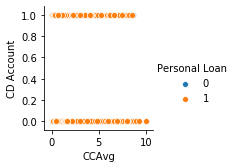

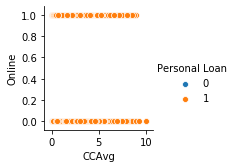

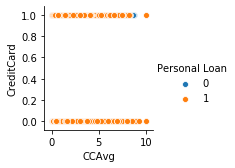

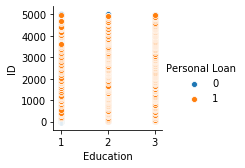

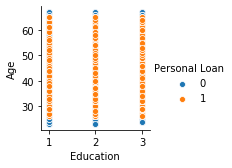

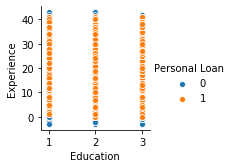

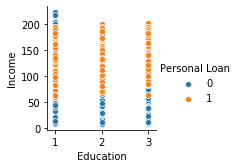

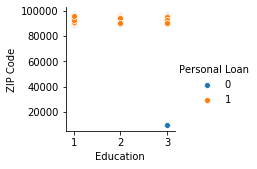

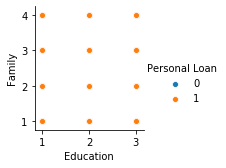

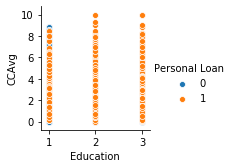

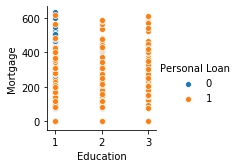

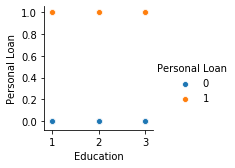

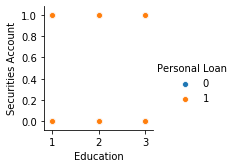

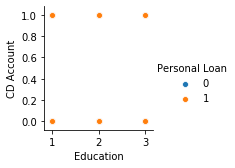

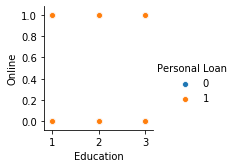

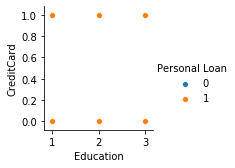

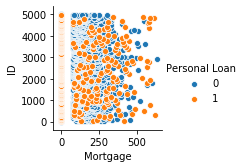

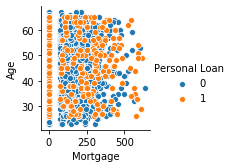

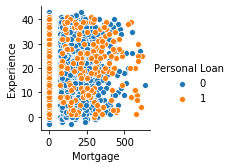

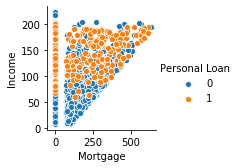

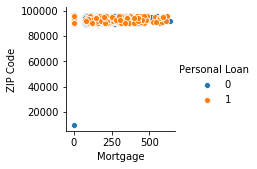

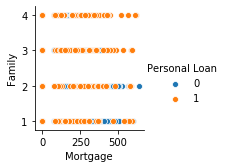

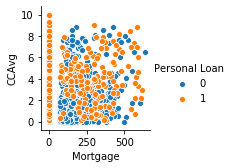

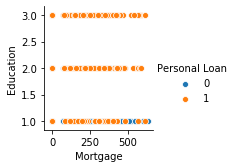

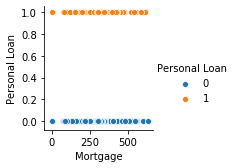

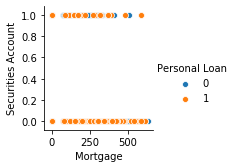

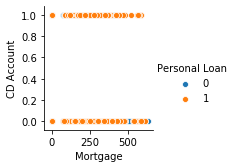

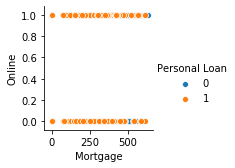

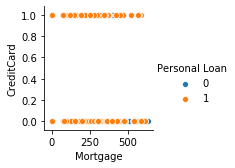

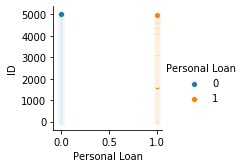

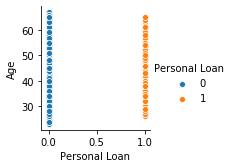

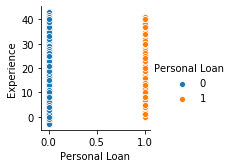

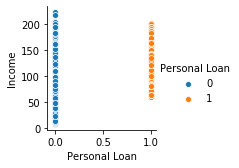

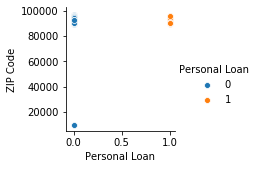

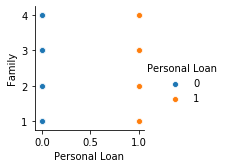

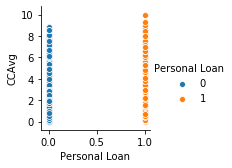

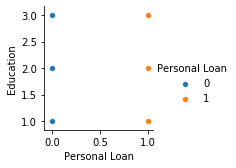

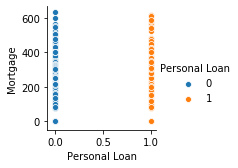

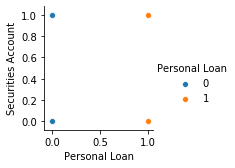

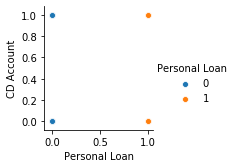

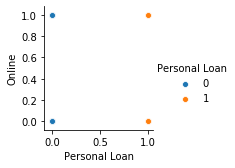

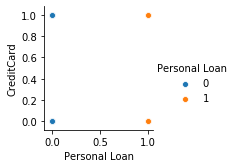

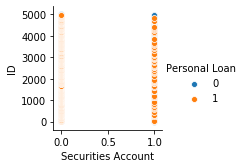

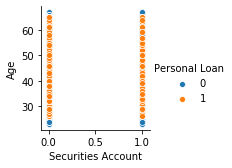

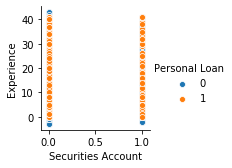

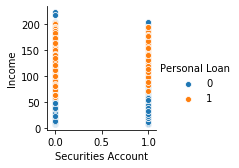

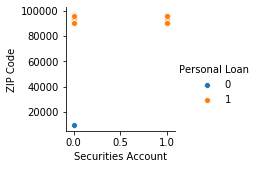

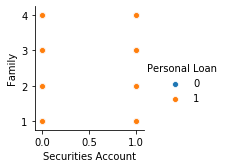

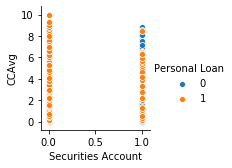

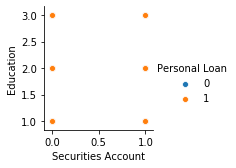

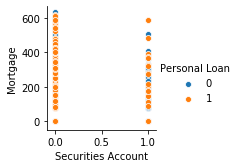

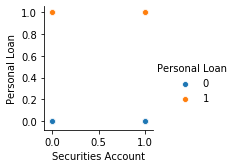

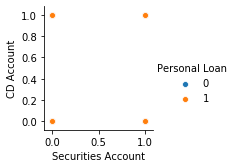

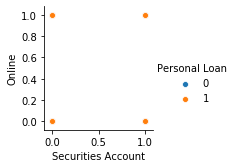

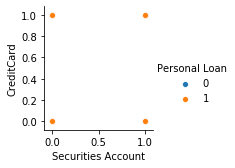

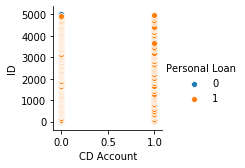

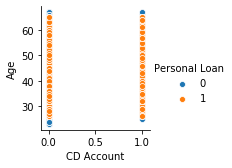

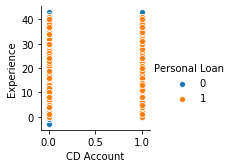

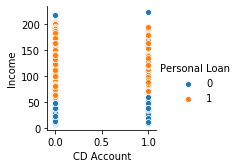

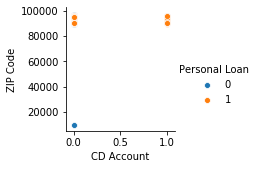

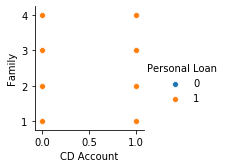

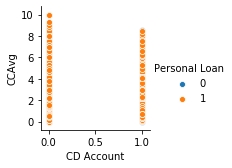

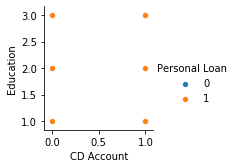

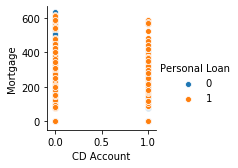

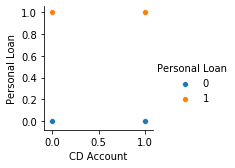

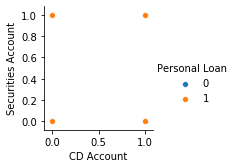

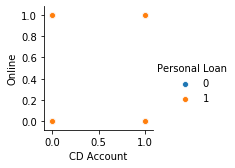

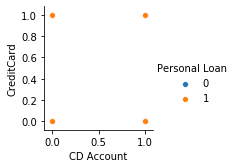

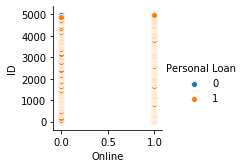

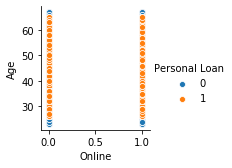

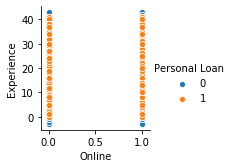

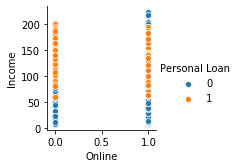

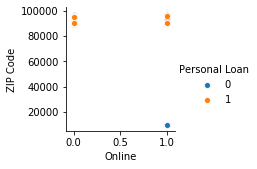

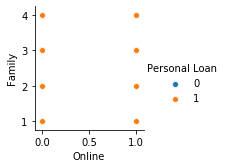

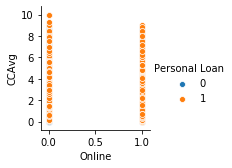

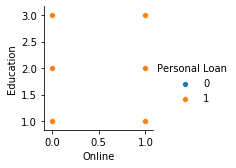

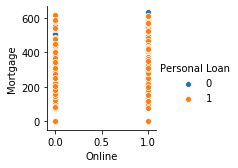

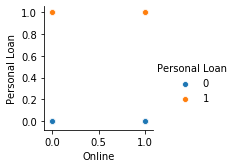

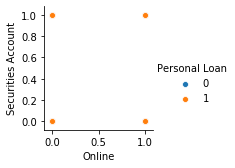

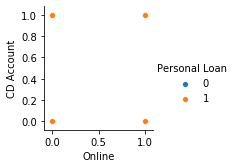

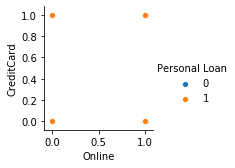

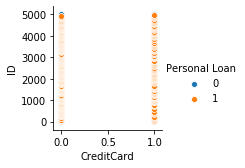

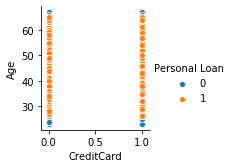

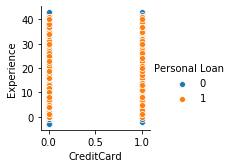

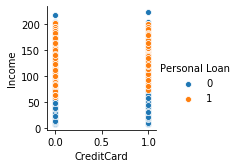

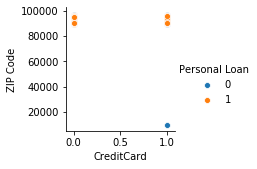

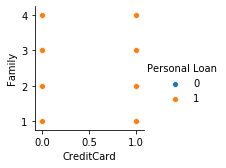

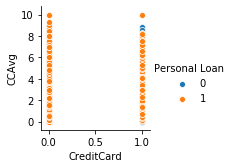

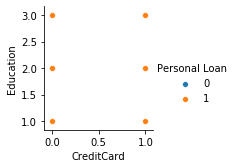

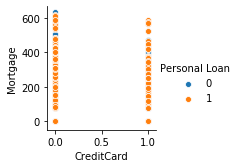

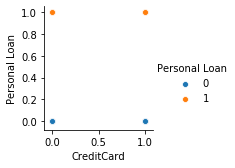

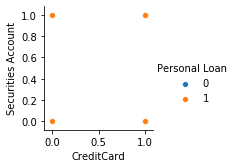

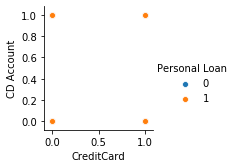

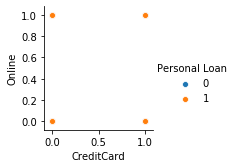

In [12]:
#sns.pairplot(data=customer_raw_data,hue='Personal Loan')
for x_col in customer_raw_data.columns:
  for y_col in customer_raw_data.columns:
    if(x_col!=y_col):
      sns.pairplot(x_vars=x_col,y_vars=y_col,data=customer_raw_data, hue='Personal Loan')

Seems like Zip Code, Family, Education, Experience have no big say on whether someone would take the personal loan or not. Of course, ID also.

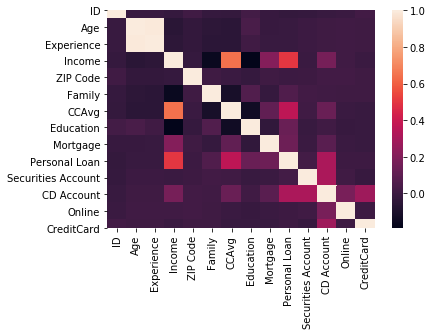

In [13]:
customer_raw_data.corr()
sns.heatmap(customer_raw_data.corr(),)

Columns considered to be dropped:
1. ID
2. Zip Code
3. Family
4. Experience
5. Education

Though from the above correlation with Personal Loan, we see that Family does have some minute influence, but that still is less than 0.5.
And also, the above seems to very less to minimal influence on other attributes.

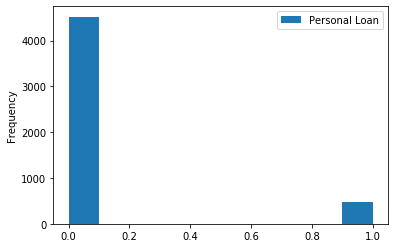

In [14]:
# Target column distribution
customer_raw_data['Personal Loan'].plot(kind='hist',legend=True)

The target column - Personal Loan seems to be right skewed.

In [15]:
customer_raw_data[ customer_raw_data['Personal Loan']==1].count()

ID                    480
Age                   480
Experience            480
Income                480
ZIP Code              480
Family                480
CCAvg                 480
Education             480
Mortgage              480
Personal Loan         480
Securities Account    480
CD Account            480
Online                480
CreditCard            480
dtype: int64

Data Cleansing:
1. Drop ID, ZIP Code
2. Correct the negative Experience to positive

In [16]:
customer_data = customer_raw_data.drop(['ID','ZIP Code'],axis=1,)
customer_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [17]:
customer_data['Experience'].min()

-3

In [0]:
customer_data['NewExperience'] = customer_data['Experience'].apply(lambda x: x*-1 if x < 0 else x)

In [19]:
customer_data[customer_data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,NewExperience
89,25,-1,113,4,2.30,3,0,0,0,0,0,1,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0,1
315,24,-2,51,3,0.30,3,0,0,0,0,1,0,2
451,28,-2,48,2,1.75,3,89,0,0,0,1,0,2
524,24,-1,75,4,0.20,1,0,0,0,0,1,0,1
536,25,-1,43,3,2.40,2,176,0,0,0,1,0,1
540,25,-1,109,4,2.30,3,314,0,0,0,1,0,1
576,25,-1,48,3,0.30,3,0,0,0,0,0,1,1
583,24,-1,38,2,1.70,2,0,0,0,0,1,0,1
597,24,-2,125,2,7.20,1,0,0,1,0,0,1,2


In [20]:
customer_data['Experience'] = customer_data['NewExperience']
customer_data.drop('NewExperience',axis=1,inplace=True)
customer_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [21]:
customer_data.shape

(5000, 12)

In [22]:
customer_data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [0]:
X = customer_data.drop('Personal Loan',axis=1)
Y = customer_data['Personal Loan']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [24]:
print("Training Records count : ",X_train.shape[0])
print("Testing Records count : ",X_test.shape[0])

Training Records count :  3500
Testing Records count :  1500


In [0]:
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

Building Logistic Regression...

In [26]:
logisticRegression_model = LogisticRegression(penalty='none',solver='newton-cg')
logisticRegression_model.fit(scaledX_train, Y_train)
Y_pred = logisticRegression_model.predict(scaledX_test)
model_score = logisticRegression_model.score(scaledX_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, Y_pred))
print("F1 score :",metrics.f1_score(Y_test,Y_pred))

0.948
[[1334   17]
 [  61   88]]
F1 score : 0.6929133858267716


Building Naive Bayes...

In [27]:
NaiveBayesModel = GaussianNB()
NaiveBayesModel.fit(scaledX_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
Y_pred = NaiveBayesModel.predict(X_test)
print("####### Classification Report ###############")
print(metrics.classification_report(Y_test, Y_pred))

print("####### Confusion Matrix ####################")
print(metrics.confusion_matrix(Y_test, Y_pred))

####### Classification Report ###############
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1351
           1       0.10      0.32      0.16       149

    accuracy                           0.66      1500
   macro avg       0.50      0.51      0.47      1500
weighted avg       0.82      0.66      0.72      1500

####### Confusion Matrix ####################
[[940 411]
 [101  48]]


Building K-NN...

In [31]:
neighbors = np.arange(1, 20,step=1)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(30):
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        
        knn = KNeighborsClassifier(n_neighbors=k)
        
        knn.fit(scaledX_train,Y_train)
        
        
        Y_pred = knn.predict(scaledX_test)
        #print("Accuracy Score ",accuracy_score(Y_test,Y_pred))
        train.append(knn.score(scaledX_train,Y_train))
        #train.append(accuracy_score(Y_train,Y_pred))
        #test.append(knn.score(scaledX_test,Y_test))
        test.append(metrics.accuracy_score(Y_test,Y_pred))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)

for i,k in enumerate(neighbors):
    print("K = ",k,": Train accuracy = ",train_accuracy_plot[i],"Test accuracy = ",test_accuracy_plot[i],"Diff=",\
         abs(train_accuracy_plot[i]-test_accuracy_plot[i]))

K =  1 : Train accuracy =  1.0 Test accuracy =  0.9577555555555556 Diff= 0.04224444444444442
K =  2 : Train accuracy =  0.969847619047619 Test accuracy =  0.9514222222222222 Diff= 0.01842539682539679
K =  3 : Train accuracy =  0.9768095238095238 Test accuracy =  0.9594888888888888 Diff= 0.01732063492063496
K =  4 : Train accuracy =  0.9650761904761905 Test accuracy =  0.9515555555555555 Diff= 0.013520634920635044
K =  5 : Train accuracy =  0.9705428571428574 Test accuracy =  0.9566666666666666 Diff= 0.01387619047619082
K =  6 : Train accuracy =  0.9618000000000001 Test accuracy =  0.9502444444444446 Diff= 0.011555555555555541
K =  7 : Train accuracy =  0.9656190476190475 Test accuracy =  0.9548222222222222 Diff= 0.01079682539682525
K =  8 : Train accuracy =  0.9583523809523808 Test accuracy =  0.9485999999999998 Diff= 0.009752380952381068
K =  9 : Train accuracy =  0.9615333333333334 Test accuracy =  0.9519333333333333 Diff= 0.009600000000000053
K =  10 : Train accuracy =  0.9551238095

KG : For K=3 it is good.

# Which model is **really** good?
### That's something which is really dependent on the number of training records, actually - I personally feel so.
### In the current scenario, we find that the K-NN seems to be working very well with a accuracy of 95.94% when K=3 (for three neighbours) against Logistic Regression and Naive Bayes.
We can choose K-NN in this case as we find some good relation of the attributes involved in the model to identify who can take Personal Loan and who would not not most accurately and not having many attributes in this situation, makes K-NN simple and easy to use to predict. (I am sure K-NN can be otherwise as well, but then, the accuracy is good in this case - that's why.)